In [2]:
import pandas as pd
import os
path = os.getcwd()

In [3]:
df = pd.read_csv(f"{path}/N4DS-NET-V01X16.csv",
                 sep=";",
                 encoding='latin-1',
                 usecols=[0, 1])
print(df.shape)
print("Nomenclature des emplois territoriaux")
df.head()
df[df.code=="BAD1"]



(1300, 2)
Nomenclature des emplois territoriaux


,code,libellé
0,BAD1,Non-TIT. / Administrateur


In [90]:
def recherche_lib(mod, df=df):
    
    test1 = df[df["libelle_grade_neg"]==mod]
    if len(test1)==0:
        print("Rien dans libelle_grade_neg")
    else:
        return test1
    
    test2 = df[df["libelle_NET_NEH"]==mod]
    if len(test2)==0:
        print("Rien dans libelle_NET_NEH")
    else:
        return test2
    
    test3 = df[df["libelle_NET_NEH_rempl"]==mod]
    if len(test3)==0:
        print("Rien dans libelle_NET_NEH_rempl")
    else:
        return test3

In [7]:
df = pd.read_csv(f"{path}/neg_carac.csv", sep=";", encoding='latin-1')
print(df.shape)
df.head()
#recherche_lib("ASHQ")

(17257, 8)


,code_grade_NEG,libelle_grade_neg,code_nomenclature_net_neh,libelle_NET_NEH,libelle_NEG_rempl,libelle_NET_NEH_rempl,code_NETH_rempl,caracteristique
0,0001,ADMINISTRATEUR HORS CLASSE,TAD2,Administrateur hors classe,ADMINISTRATEUR HORS CLASSE,Administrateur hors classe,TAD2,"DECRETS 87-1097 ET 87-1098 DU 30 12 1987, MODI..."
1,0002,ADMINISTRATEUR DE PREMIERE CLASSE,AAD1,NaN,ADMINISTRATEUR,Administrateur,TAD1,DECRETS 87-1097 ET 87-1098 DU 30 12 1987
2,0003,ADMINISTRATEUR DE DEUXIEME CLASSE,AAD1,NaN,ADMINISTRATEUR,Administrateur,TAD1,DECRETS 87-1097 ET 87-1098 DU 30 12 1987
3,0004,DIRECTEUR DE CLASSE EXCEPTIONNELLE,NaN,NaN,DIRECTEUR TERRITORIAL,Directeur territorial,TAT3,DECRETS 87-1099 ET 87-1100 DU 30 12 1987
4,0005,DIRECTEUR TERRITORIAL DE CLASSE NORMALE,NaN,NaN,DIRECTEUR TERRITORIAL,Directeur territorial,TAT3,DECRETS 87-1099 ET 87-1100 DU 30 12 1987


<br>
<br>
<br>
<br>

### Evolution des nomenclatures des emploi territoriaux et hospitaliers depuis 1999.EN gros : ce dataset va probablement servir à complèter les données manquantes en piochant les infos qui nous intéressent.

### Les données de fin dans le futur représentent (probablement) les nomenclatures en vigueur actuellement. DOnc il est probable que l'on utilise que les date d'effet et de choisir celle la plus proche qui nous intéresse (ex : on cherche la nomenclare de emploi X à date Y, on cherche la nomenclature la plus proche avant la date Y)

In [18]:
df = pd.read_csv(f"{path}/neg_net_neh.csv", sep=";", encoding='latin-1', low_memory=False)
print(df.shape)
df.head(5)
#df[df["code_NETH_rempl"]=="TAD2"]
#df[df.date_effet.str.contains("2008")]
#print(df.code_NETH_rempl.isna().sum())
#print(df.libelle_NET_NEH_rempl.isna().sum())
#df.isna().sum()
#df[df.code_grade_NEG == "1314"]

(712969, 13)


,code_grade_NEG,libelle_grade_neg,code_nomenclature_net_neh,libelle_NET_NEH,date_effet,date_fin,indice_brut,rang_echelon,code_etat,libelle_NEG_rempl,libelle_NET_NEH_rempl,code_NETH_rempl,libelle_statut
0,0001,ADMINISTRATEUR HORS CLASSE,TAD2,Administrateur hors classe,01JAN1988,05/06/2000,801,1,1,ADMINISTRATEUR HORS CLASSE,Administrateur hors classe,TAD2,Fonction publique territoriale
1,0001,ADMINISTRATEUR HORS CLASSE,TAD2,Administrateur hors classe,01JAN1988,05/06/2000,852,2,1,ADMINISTRATEUR HORS CLASSE,Administrateur hors classe,TAD2,Fonction publique territoriale
2,0001,ADMINISTRATEUR HORS CLASSE,TAD2,Administrateur hors classe,01JAN1988,05/06/2000,901,3,1,ADMINISTRATEUR HORS CLASSE,Administrateur hors classe,TAD2,Fonction publique territoriale
3,0001,ADMINISTRATEUR HORS CLASSE,TAD2,Administrateur hors classe,01JAN1988,05/06/2000,966,4,1,ADMINISTRATEUR HORS CLASSE,Administrateur hors classe,TAD2,Fonction publique territoriale
4,0001,ADMINISTRATEUR HORS CLASSE,TAD2,Administrateur hors classe,01JAN1988,05/06/2000,1015,5,1,ADMINISTRATEUR HORS CLASSE,Administrateur hors classe,TAD2,Fonction publique territoriale


In [23]:
df = pd.read_csv(f"{path}/hackhaton_100k_alea_b.csv", sep=";", encoding='latin-1', low_memory=False)
print(df.shape)
print(df.head())
#df = df[df["ID_CARRIERE"]==98]
#df.loc[100:200,:]
df.isna().sum()

(6534962, 10)
   ID_CARRIERE  date_debut    date_fin  ETAT CATEGORIE_EMPLOI QUALITE  \
0           98  01/09/1993  31/12/1993     1                A       S   
1           98  01/01/1994  31/08/1994     1                A       S   
2           98  01/09/1994  31/12/1994     1                A       T   
3           98  01/01/1995  30/04/1995     1                A       T   
4           98  01/05/1995  31/12/1995     1                A       T   

  STATUT_AGENT  INDICE_BRUT EMPLOI_STATUTAIRE LIBELLE_EMPLOI_GRADE  
0            T        232.0               NaN      Agent Technique  
1            T        232.0               NaN      Agent Technique  
2            T        242.0               NaN      Agent Technique  
3            T        242.0               NaN      Agent Technique  
4            T        257.0               NaN      Agent Technique  


ID_CARRIERE                   0
date_debut                    0
date_fin                      0
ETAT                          0
CATEGORIE_EMPLOI           1431
QUALITE                    1973
STATUT_AGENT               1959
INDICE_BRUT             1055117
EMPLOI_STATUTAIRE       2925509
LIBELLE_EMPLOI_GRADE     206424
dtype: int64

In [74]:
df_ = df[df["ID_CARRIERE"]==98]
df_.EMPLOI_STATUTAIRE.value_counts()

TTT3    23
Name: EMPLOI_STATUTAIRE, dtype: int64

<AxesSubplot:xlabel='date_debut', ylabel='INDICE_BRUT'>

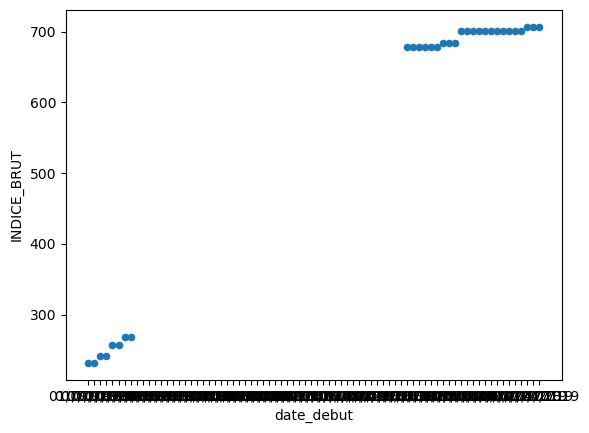

In [64]:
df_.plot("date_debut","INDICE_BRUT", kind="scatter")

In [3]:
df = pd.read_csv(f"{path}/hackhaton_020k_alea_b.csv", encoding='latin-1', low_memory=False)
print(df.shape)
df.head(5)

(1048575, 12)


,ID_CARRIERE,date_debut,date_fin,ETAT,CATEGORIE_EMPLOI,QUALITE,STATUT_AGENT,INDICE_BRUT,EMPLOI_STATUTAIRE,LIBELLE_EMPLOI_GRADE,Unnamed: 10,Unnamed: 11
0,56,01/01/1999,26/03/1999,1,A,T,T,NaN,NaN,ADJOINT ADMINISTRATIF.........,NaN,NaN
1,56,27/03/1999,16/07/1999,1,A,T,T,NaN,NaN,ADJOINT ADMINISTRATIF.........,NaN,NaN
2,56,17/07/1999,31/12/1999,1,A,T,T,NaN,NaN,ADJOINT ADMINISTRATIF.........,NaN,NaN
3,56,01/01/2000,02/07/2000,1,A,T,T,NaN,NaN,ADJOINT ADMINISTRATIF.........,NaN,NaN
4,56,03/07/2000,19/07/2000,1,A,T,T,NaN,NaN,ADJOINT ADMINISTRATIF.........,NaN,NaN


In [4]:
len(df.ID_CARRIERE.value_counts())

14010